In [45]:


from ms.metaresearch.selectors.causal import TEDAGSelector, CFSelector
from ms.metaresearch.selectors.model_based import XGBSelector, LassoSelector
from ms.metaresearch.selectors.model_free import CorrelationSelector, FValueSelector, MutualInfoSelector

from ms.metalearning.isa import InstanceSpaceAnalysis

corr = CorrelationSelector(
    corr_type="spearman",
    p_threshold=0.05,
    corr_threshold=0.0,
)
mi = MutualInfoSelector(
    quantile_value=0.0,
)
f_val = FValueSelector(
    p_threshold=0.05,
    quantile_value=0.0,
)
lasso = LassoSelector(
    coef_threshold=0.0,
    reg_params=None,
    class_params=None,
    random_state=42,
)
xgb = XGBSelector(
    importance_threshold=0.0,
    reg_params=None,
    class_params=None,
    random_state=42,
)
te_dag = TEDAGSelector()
cf = CFSelector()


selectors = {
    "corr": corr,
    # "mi": mi,
    "f_val": f_val, 
    # "lasso": lasso,
    "xgb": xgb,
    # "te": te,
    "cf": cf,
    # "te_dag": te_dag,
    # "base": base,
}

isa = InstanceSpaceAnalysis(n_tries=10)
metrics_suffixes = ["perf_abs"]
features_suffixes = ["power"]

In [35]:
selectors_res = []

In [ ]:
for features_suffix in features_suffixes:
    print(features_suffix)
    for metrics_suffix in metrics_suffixes:
        print(metrics_suffix)
        for selector in selectors:
            print(selector.class_name)
            selector.perform(
                features_suffix=features_suffix,
                metrics_suffix=metrics_suffix,
                to_rewrite=False,
            )

In [43]:
from ms.metalearning.isa import PILOTResult
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.spatial import ConvexHull

def plot(
        res: PILOTResult,
        features: pd.DataFrame,
        target_bin: pd.DataFrame,
        selector_name: str
):
    # Step 1: Compute the transformed space (Z1, Z2)
    summary = res.summary
    z_matrix = [[summary.iloc[i, 0], summary.iloc[i, 1]] for i in range(summary.shape[0])]
    z = pd.DataFrame(z_matrix, index=features.columns, columns=["z1", "z2"])
    transformed_features = features.dot(z)

    # Step 2: Extract true cluster labels (binary: 0 or 1)
    true_labels = target_bin.iloc[:, 0].values  # Assuming single-column cluster labels

    # Step 3: Compute Silhouette Score based on true labels
    silhouette = silhouette_score(transformed_features, true_labels)

    # Step 4: Define binary colormap (red for 0, blue for 1)
    cmap = ListedColormap(["red", "blue"])

    # Step 5: Plot the transformed space with true clusters
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        transformed_features["z1"],
        transformed_features["z2"],
        c=true_labels,
        cmap=cmap,
        alpha=0.7,
        edgecolors="k"
    )

    # Step 6: Draw convex hulls for each cluster
    unique_labels = np.unique(true_labels)
    for label in unique_labels:
        points = transformed_features[true_labels == label]
        if len(points) > 2:  # ConvexHull requires at least 3 points
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                plt.plot(points.iloc[simplex, 0], points.iloc[simplex, 1], "k-")

    # Step 7: Add Title, Labels, and Legend
    plt.title(f"{target_bin.columns[0]}_{selector_name} | Silhouette Score: {silhouette:.4f}")
    plt.xlabel("Z1")
    plt.ylabel("Z2")
    plt.colorbar(scatter, ticks=[0, 1], label="True Cluster")
    plt.grid(True)

    # Show the plot
    plt.show()
    plt.close()
    return silhouette

-------------------
corr
-------------------


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Started PILOT
Performing BFGS optimization
Computing z1, z2
                                               z1      z2
f__pymfe.general.nr_class                  0.8064 -0.3326
f__pymfe.landmarking.best_node.mean        0.0552  0.2715
f__pymfe.landmarking.random_node.min       0.1139  0.3085
f__pymfe.model-based.leaves_per_class.max  0.3084  0.3565
f__pymfe.model-based.leaves_per_class.min  0.2619  0.3583
f__pymfe.statistical.cov.min               0.3250  0.0721
f__pymfe.statistical.max.min               0.2759  0.0727
f__pymfe.statistical.sd.min                0.3853  0.0694
f__pymfe.statistical.skewness.min          0.3804  0.0658
f__pymfe.statistical.w_lambda             -0.0528  0.1941


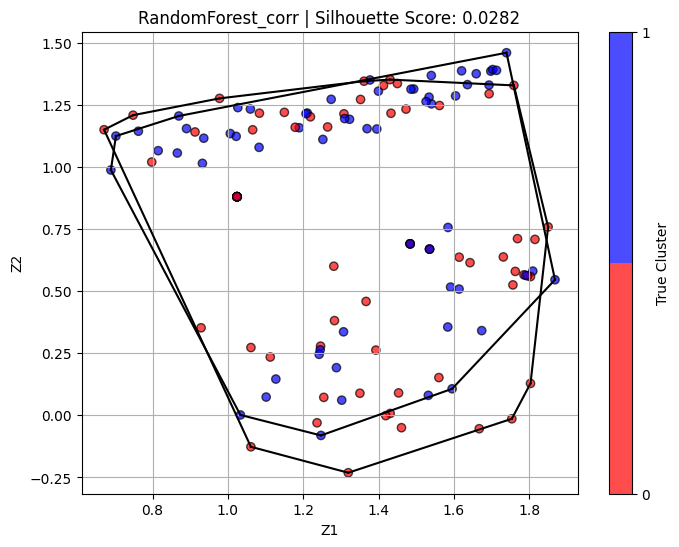

0.028210675733075077
-------------------
f_val
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                               z1      z2
f__pymfe.general.nr_class                  1.6814 -0.0173
f__pymfe.landmarking.best_node.mean       -0.4167 -0.5150
f__pymfe.landmarking.random_node.min      -0.3870 -0.6042
f__pymfe.model-based.leaves_per_class.max -0.2156 -0.8274
f__pymfe.model-based.leaves_per_class.min -0.2777 -0.8019
f__pymfe.statistical.cov.min               0.3110 -0.3572
f__pymfe.statistical.max.min               0.2451 -0.3171
f__pymfe.statistical.sd.min                0.3989 -0.4091
f__pymfe.statistical.skewness.min          0.4013 -0.3921
f__pymfe.statistical.w_lambda             -0.4193 -0.2994


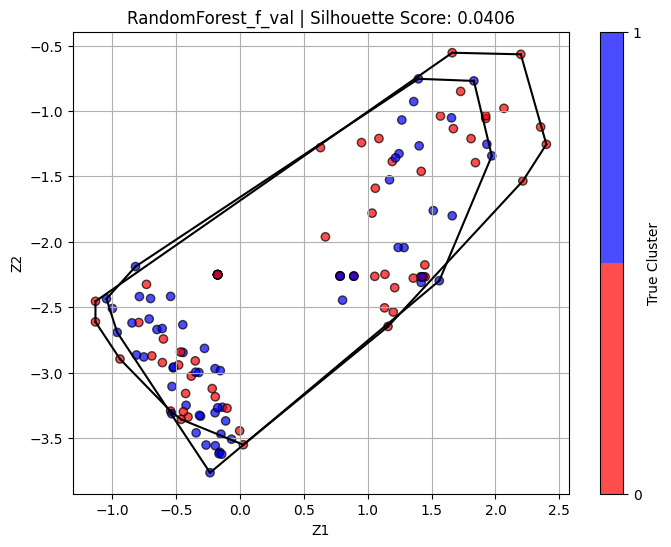

0.04058589857576465
-------------------
xgb
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                                   z1      z2
f__pymfe.general.nr_bin                       -0.4638  0.1896
f__pymfe.landmarking.linear_discr.kurtosis     0.0957  0.4452
f__pymfe.landmarking.random_node.kurtosis      0.1673  0.4848
f__pymfe.model-based.leaves_corrob.kurtosis    0.8521  0.5886
f__pymfe.model-based.nodes_per_level.kurtosis  0.9253  0.6061
f__pymfe.model-based.var_importance.max       -1.2128  0.4106
f__pymfe.statistical.can_cor.min              -0.1151  0.5854
f__pymfe.statistical.cov.kurtosis              0.9614  0.6894
f__pymfe.statistical.max.min                  -0.8689  0.2748
f__pymfe.statistical.min.min                  -0.9516  0.3309


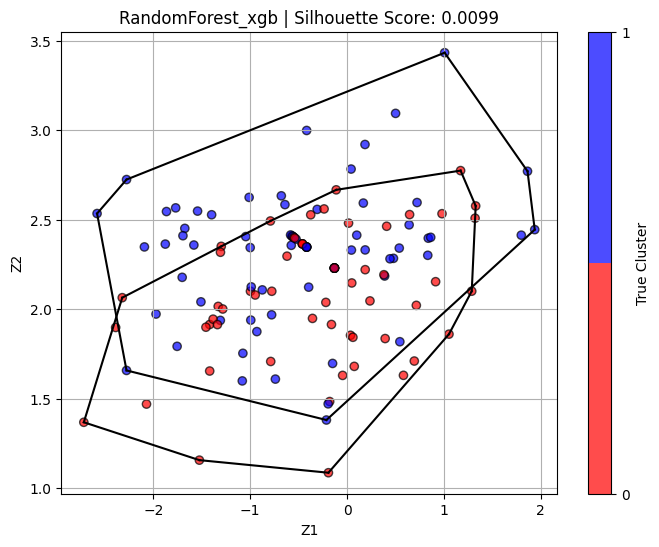

0.009863088518750403
-------------------
cf
-------------------


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Started PILOT
Performing BFGS optimization
Computing z1, z2
                                               z1      z2
f__pymfe.landmarking.best_node.mean       -0.3243 -0.2296
f__pymfe.landmarking.random_node.min      -0.3108 -0.2044
f__pymfe.model-based.leaves_per_class.max -0.3459 -0.3193
f__pymfe.model-based.leaves_per_class.min -0.3770 -0.2688
f__pymfe.statistical.cov.min               0.0900 -0.4359
f__pymfe.statistical.max.min               0.1376 -0.3750
f__pymfe.statistical.sd.min                0.1019 -0.4808
f__pymfe.statistical.skewness.min         -0.1021 -0.3573
f__pymfe.statistical.sparsity.kurtosis    -0.4435 -0.2626
f__pymfe.statistical.w_lambda             -0.1172 -0.1093


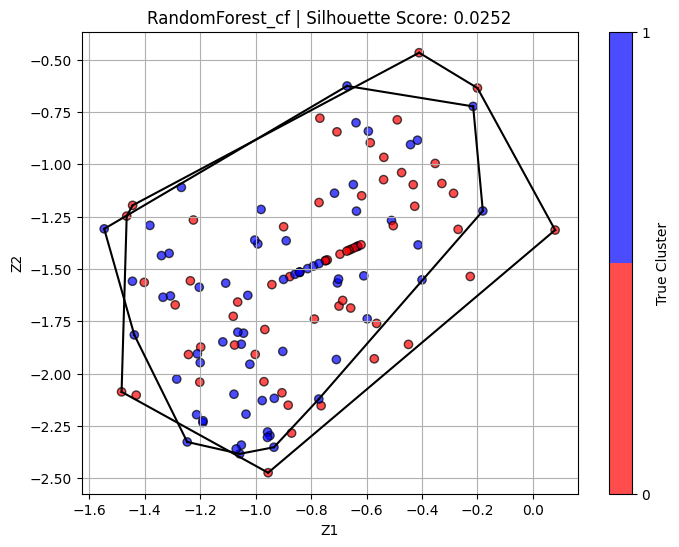

0.02520226791329597
-------------------
corr
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                             z1      z2
f__pymfe.model-based.var_importance.min  0.1280 -0.5215
f__pymfe.statistical.cov.min             0.3561 -0.3440
f__pymfe.statistical.eigenvalues.min     0.2429 -0.3512
f__pymfe.statistical.mad.min             0.1812 -0.3574
f__pymfe.statistical.max.min             0.3640 -0.3452
f__pymfe.statistical.min.kurtosis        0.3259  0.4284
f__pymfe.statistical.roy_root            0.7005  0.4888
f__pymfe.statistical.sd.min              0.3005 -0.3378
f__pymfe.statistical.sparsity.kurtosis   0.4086  0.4395
f__pymfe.statistical.w_lambda            0.6324 -0.1712


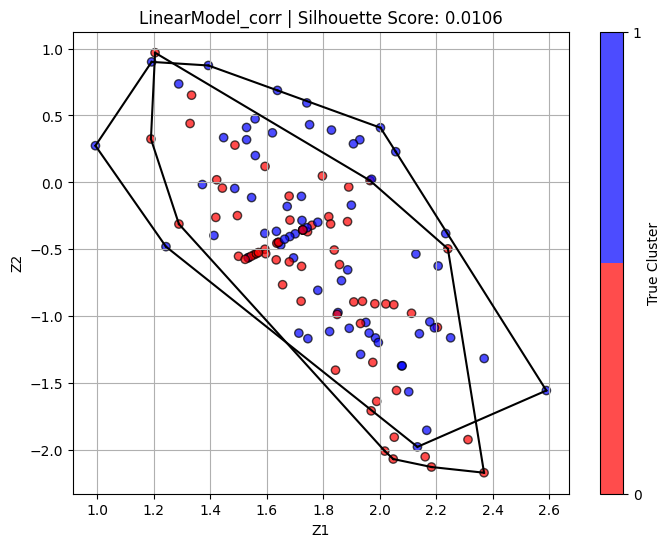

0.010622937116055798
-------------------
f_val
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                              z1      z2
f__pymfe.model-based.var_importance.mean -0.1913  0.5575
f__pymfe.model-based.var_importance.min   0.2474  0.4952
f__pymfe.statistical.cov.min             -0.2143  0.5497
f__pymfe.statistical.eigenvalues.min     -0.0375  0.4554
f__pymfe.statistical.max.min             -0.2066  0.5512
f__pymfe.statistical.min.kurtosis        -0.6909 -0.0098
f__pymfe.statistical.roy_root            -1.1942  0.2312
f__pymfe.statistical.sd.min              -0.1651  0.5081
f__pymfe.statistical.sparsity.kurtosis   -0.8216  0.0400
f__pymfe.statistical.w_lambda            -0.5838  0.6829


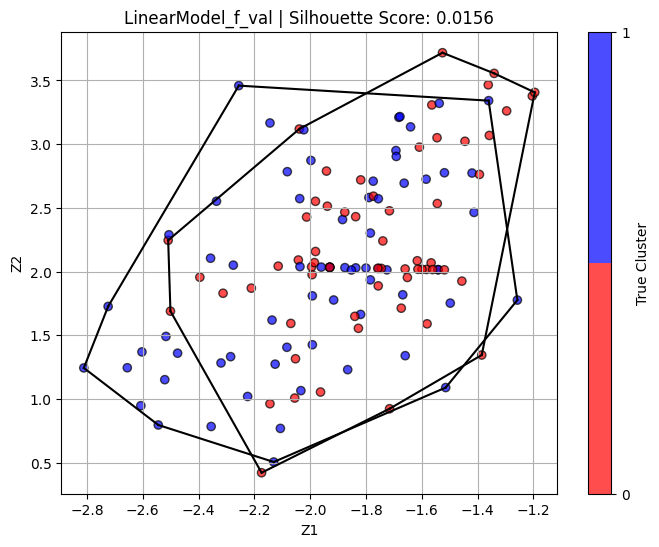

0.015612691548559222
-------------------
xgb
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                                  z1      z2
f__pymfe.landmarking.best_node.sd            -0.0624 -0.3207
f__pymfe.landmarking.naive_bayes.min          0.0749 -0.4658
f__pymfe.landmarking.one_nn.mean              0.1611 -0.3831
f__pymfe.landmarking.random_node.skewness    -0.1438 -0.2408
f__pymfe.model-based.nodes_per_inst          -0.2477 -0.1755
f__pymfe.model-based.nodes_repeated.skewness -0.2786 -0.1863
f__pymfe.statistical.cov.kurtosis            -0.5094 -0.1115
f__pymfe.statistical.mad.min                  0.6627 -0.4224
f__pymfe.statistical.max.min                  0.2115 -0.4389
f__pymfe.statistical.sd.skewness             -0.4728 -0.1464


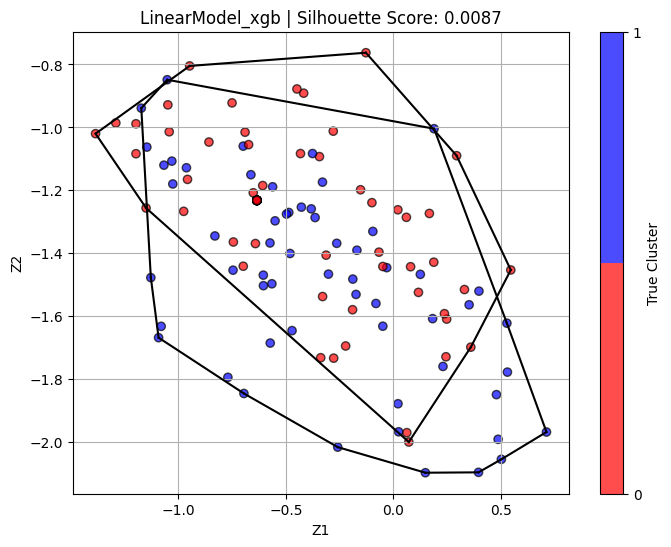

0.008725784617768122
-------------------
cf
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                               z1      z2
f__pymfe.landmarking.random_node.min      -0.4472  0.5150
f__pymfe.model-based.leaves_per_class.max -0.5167  0.4947
f__pymfe.model-based.var_importance.mean  -0.5417  0.1866
f__pymfe.statistical.cov.min              -0.4748  0.3506
f__pymfe.statistical.roy_root              0.7424  1.1715
f__pymfe.statistical.sd.min               -0.4294  0.4464
f__pymfe.statistical.skewness.min         -0.1874  0.3939
f__pymfe.statistical.sparsity.kurtosis     0.6782  0.9018
f__pymfe.statistical.sparsity.skewness     0.6384  0.5562
f__pymfe.statistical.w_lambda             -0.6615  0.4634


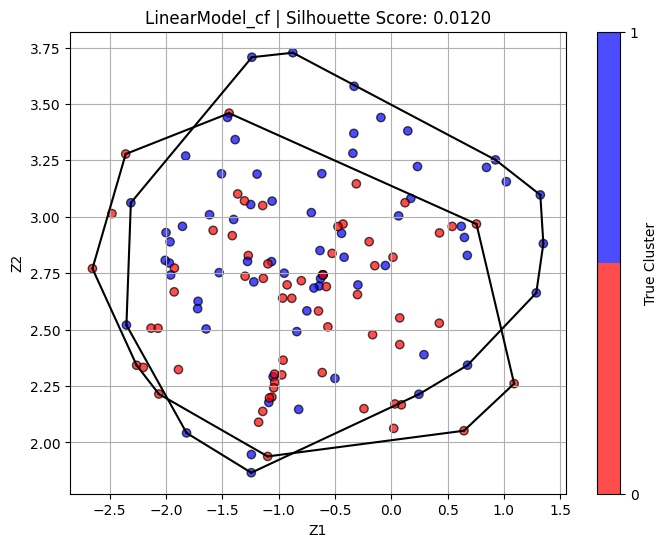

0.012032432227101033
-------------------
corr
-------------------


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Started PILOT
Performing BFGS optimization
Computing z1, z2
                                             z1      z2
f__pymfe.model-based.var_importance.min  1.0961  0.3784
f__pymfe.statistical.cor.min             1.0695 -0.1361
f__pymfe.statistical.cov.min             0.8453  0.4734
f__pymfe.statistical.mad.min             1.1097  0.4991
f__pymfe.statistical.max.min             1.1108  0.0604
f__pymfe.statistical.min.kurtosis       -0.5298 -0.8364
f__pymfe.statistical.sd.min              1.1039  0.1353
f__pymfe.statistical.sparsity.kurtosis  -0.5533 -0.8551
f__pymfe.statistical.sparsity.max       -0.2416 -0.4884
f__pymfe.statistical.sparsity.skewness  -0.5684 -0.6886


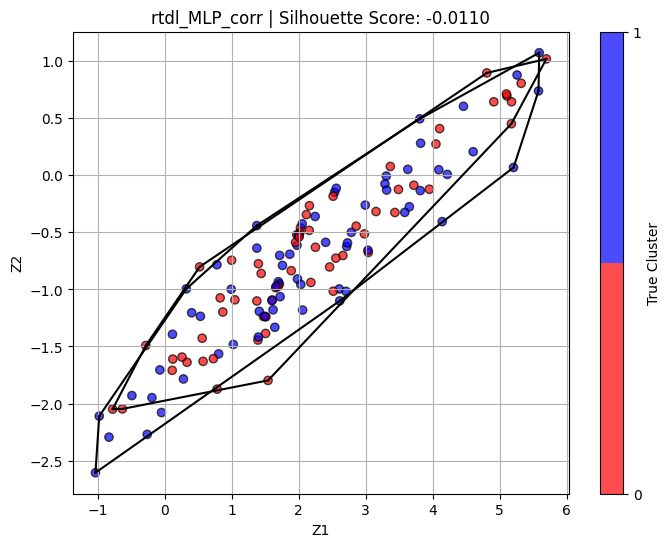

-0.011027440098471208
-------------------
f_val
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                             z1      z2
f__pymfe.model-based.var_importance.min  0.2902  0.0485
f__pymfe.statistical.cor.min             0.2981  0.3608
f__pymfe.statistical.cov.min             0.2198 -0.0753
f__pymfe.statistical.mad.min             0.2900 -0.0227
f__pymfe.statistical.max.min             0.3062  0.2487
f__pymfe.statistical.min.kurtosis       -0.1202  0.3814
f__pymfe.statistical.sd.min              0.2968  0.2026
f__pymfe.statistical.sparsity.kurtosis  -0.1276  0.3878
f__pymfe.statistical.sparsity.max       -0.0532  0.2410
f__pymfe.statistical.sparsity.skewness  -0.1356  0.2801


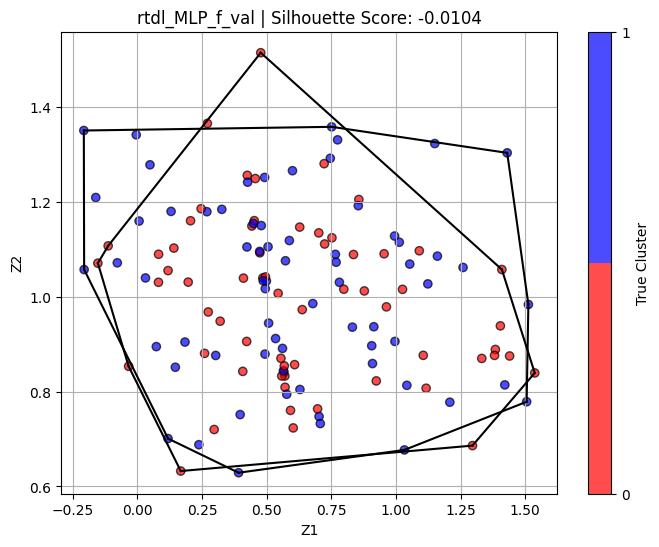

-0.010355347548638044
-------------------
xgb
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                               z1      z2
f__pymfe.general.nr_attr                   0.3904  0.1874
f__pymfe.general.nr_num                    0.3925  0.2196
f__pymfe.model-based.leaves_per_class.min  0.3382 -0.2908
f__pymfe.model-based.tree_shape.sd         0.2505 -0.2828
f__pymfe.statistical.cov.kurtosis          0.3130  0.2700
f__pymfe.statistical.iq_range.skewness     0.3889  0.1790
f__pymfe.statistical.min.min               0.1910 -0.3733
f__pymfe.statistical.nr_cor_attr           0.3615  0.1221
f__pymfe.statistical.range.kurtosis        0.4859  0.1770
f__pymfe.statistical.sparsity.sd           0.1689 -0.2074


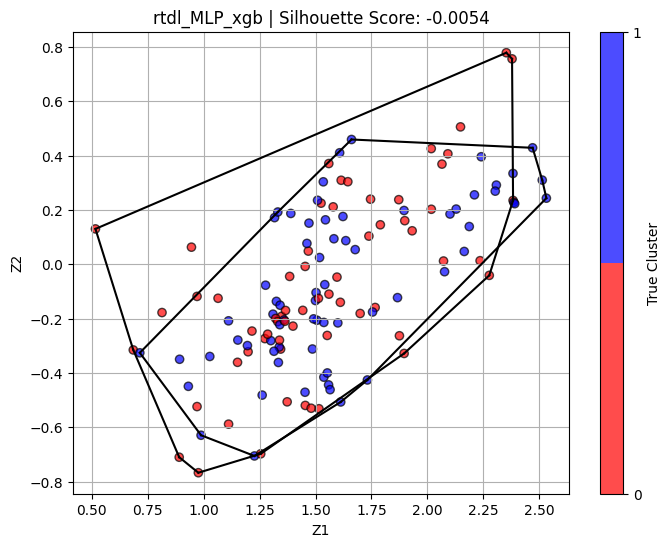

-0.005423493599514313
-------------------
cf
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                             z1      z2
f__pymfe.model-based.var_importance.max -0.1851 -0.3049
f__pymfe.model-based.var_importance.min -0.2564 -0.1121
f__pymfe.statistical.cov.min            -0.2284 -0.1390
f__pymfe.statistical.kurtosis.mean       0.1334 -0.2183
f__pymfe.statistical.mad.min            -0.3092 -0.0293
f__pymfe.statistical.max.min            -0.2409 -0.2006
f__pymfe.statistical.sd.min             -0.2465 -0.1551
f__pymfe.statistical.sparsity.kurtosis   0.1743 -0.2907
f__pymfe.statistical.sparsity.max        0.1003 -0.2103
f__pymfe.statistical.sparsity.skewness   0.1616 -0.2344


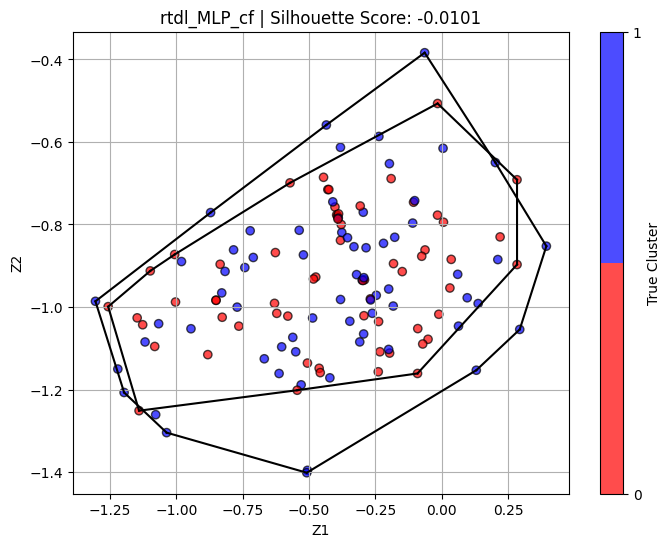

-0.010086598544336368
-------------------
corr
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                               z1      z2
f__pymfe.general.attr_to_inst             -0.1971  0.1177
f__pymfe.general.nr_bin                   -0.1649  0.3472
f__pymfe.model-based.leaves_per_class.max -0.2751 -0.0198
f__pymfe.statistical.cor.min              -0.2479 -0.1211
f__pymfe.statistical.cov.min              -0.1460 -0.1736
f__pymfe.statistical.mad.min              -0.0905 -0.3773
f__pymfe.statistical.max.min              -0.1665 -0.1443
f__pymfe.statistical.min.kurtosis         -0.3072  0.1250
f__pymfe.statistical.sd.min               -0.2168 -0.1866
f__pymfe.statistical.sparsity.max         -0.2689  0.2640


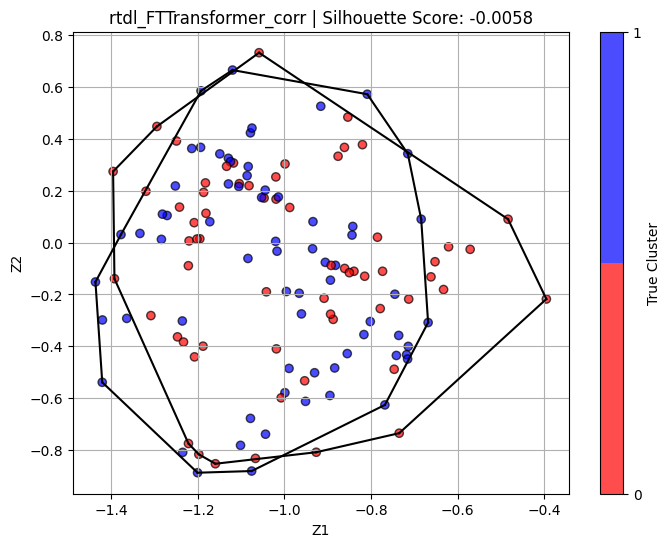

-0.0058032118505434846
-------------------
f_val
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                               z1      z2
f__pymfe.general.attr_to_inst             -0.2016  0.1645
f__pymfe.general.nr_bin                   -0.0706  0.4833
f__pymfe.model-based.leaves_per_class.max -0.3522 -0.0265
f__pymfe.statistical.cor.min              -0.3553 -0.1657
f__pymfe.statistical.cov.min              -0.2542 -0.2420
f__pymfe.statistical.mad.min              -0.2610 -0.5243
f__pymfe.statistical.max.min              -0.2654 -0.1973
f__pymfe.statistical.min.kurtosis         -0.3355  0.1756
f__pymfe.statistical.sd.min               -0.3416 -0.2593
f__pymfe.statistical.sparsity.max         -0.2346  0.3681


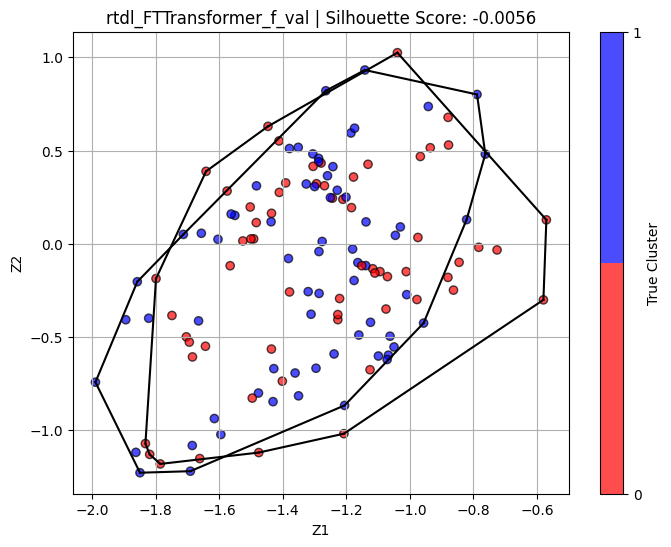

-0.005590803053585554
-------------------
xgb
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                                 z1      z2
f__pymfe.general.nr_inst                    -0.4777 -0.5912
f__pymfe.landmarking.linear_discr.kurtosis  -0.4072 -0.0347
f__pymfe.landmarking.random_node.sd         -0.4621  0.5061
f__pymfe.model-based.leaves_branch.skewness -0.3661 -0.4908
f__pymfe.model-based.leaves_per_class.max   -0.5651 -0.0001
f__pymfe.model-based.nodes_per_attr         -0.4685 -0.2724
f__pymfe.statistical.can_cor.min            -0.6239 -0.0802
f__pymfe.statistical.mad.min                -0.3143  0.6984
f__pymfe.statistical.median.min             -0.4591  0.3361
f__pymfe.statistical.min.kurtosis           -0.5054 -0.3989


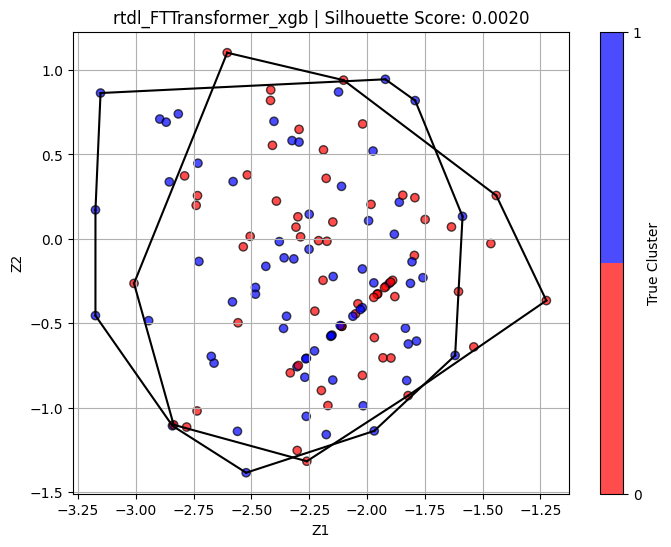

0.001997806590125662
-------------------
cf
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                               z1      z2
f__pymfe.general.attr_to_inst              0.4518  0.2162
f__pymfe.landmarking.random_node.kurtosis  0.2753 -0.0534
f__pymfe.landmarking.worst_node.mean       0.2307 -0.3161
f__pymfe.model-based.tree_imbalance.max    0.3882 -0.0163
f__pymfe.statistical.cor.sd                0.2634 -0.1554
f__pymfe.statistical.cov.min              -0.0958 -0.4921
f__pymfe.statistical.max.min              -0.1597 -0.3942
f__pymfe.statistical.median.min            0.0925 -0.3065
f__pymfe.statistical.sd.min                0.0253 -0.6247
f__pymfe.statistical.sparsity.max          0.4257  0.0385


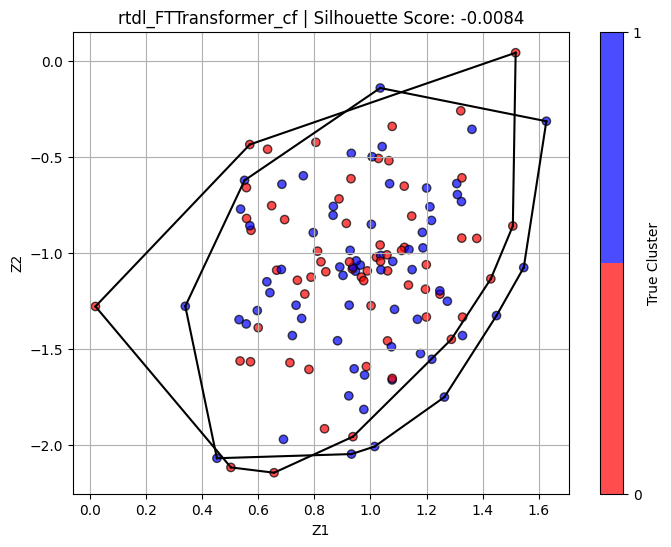

-0.008440102078502905
-------------------
corr
-------------------


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Started PILOT
Performing BFGS optimization
Computing z1, z2
                                               z1      z2
f__pymfe.landmarking.random_node.kurtosis  0.2054  0.2739
f__pymfe.model-based.leaves_per_class.max  0.3636  0.2270
f__pymfe.statistical.cor.mean              0.2601  0.3557
f__pymfe.statistical.cor.min               0.4588  0.1310
f__pymfe.statistical.cov.min               0.4367 -0.0225
f__pymfe.statistical.mad.min               0.4213 -0.1200
f__pymfe.statistical.max.min               0.5628  0.1366
f__pymfe.statistical.nr_cor_attr           0.0899  0.3094
f__pymfe.statistical.sparsity.kurtosis    -0.0431  0.6352
f__pymfe.statistical.sparsity.skewness    -0.0645  0.5615


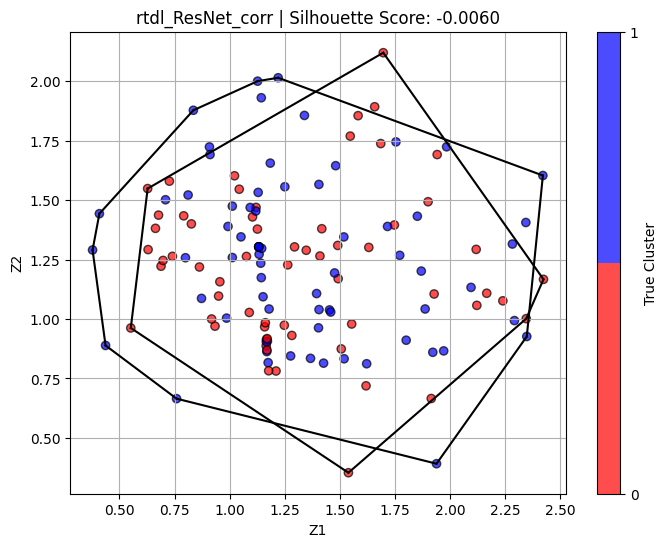

-0.0060418121576274715
-------------------
f_val
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                               z1      z2
f__pymfe.landmarking.random_node.kurtosis  0.4052  0.2409
f__pymfe.model-based.leaves_per_class.max  0.4303  0.4680
f__pymfe.statistical.cor.mean              0.5378  0.3180
f__pymfe.statistical.cor.min               0.3672  0.6096
f__pymfe.statistical.cov.min               0.1780  0.6109
f__pymfe.statistical.mad.min               0.0696  0.6021
f__pymfe.statistical.max.min               0.4316  0.7590
f__pymfe.statistical.nr_cor_attr           0.3789  0.0655
f__pymfe.statistical.sparsity.kurtosis     0.6876 -0.1597
f__pymfe.statistical.sparsity.skewness     0.6022 -0.1793


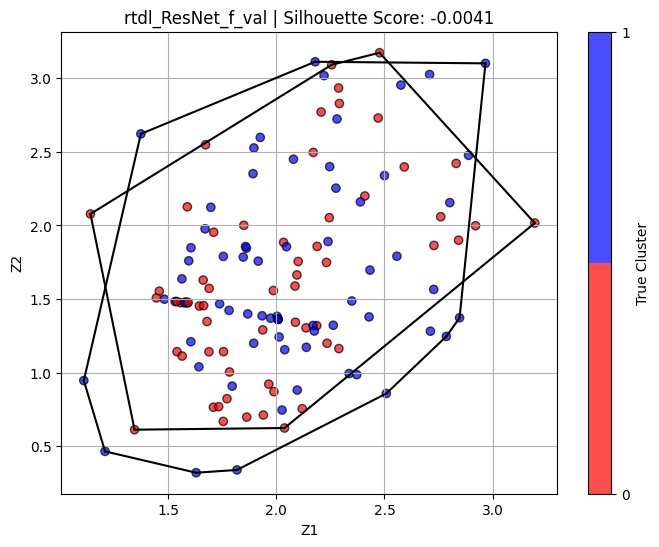

-0.004103207350499298
-------------------
xgb
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                                z1      z2
f__pymfe.landmarking.linear_discr.kurtosis  0.1368 -0.4097
f__pymfe.landmarking.linear_discr.skewness -0.3365 -0.0289
f__pymfe.landmarking.naive_bayes.mean       0.1803 -0.6926
f__pymfe.landmarking.one_nn.kurtosis        0.0685 -0.4110
f__pymfe.landmarking.random_node.skewness  -0.1844 -0.1961
f__pymfe.model-based.leaves_per_class.max  -0.2473 -0.0998
f__pymfe.statistical.cov.kurtosis          -0.1731 -0.2156
f__pymfe.statistical.cov.min               -0.1796 -0.2544
f__pymfe.statistical.kurtosis.mean         -0.3230 -0.0865
f__pymfe.statistical.w_lambda              -0.4103 -0.0144


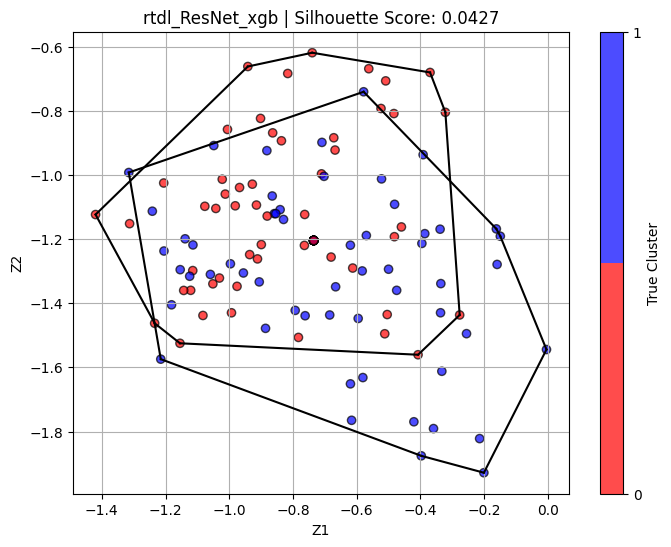

0.04267259875254308
-------------------
cf
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                            z1      z2
f__pymfe.landmarking.random_node.sd     0.0868  0.2299
f__pymfe.model-based.tree_shape.mean    0.2092  0.2240
f__pymfe.statistical.cor.mean           0.2033  0.1809
f__pymfe.statistical.cor.min            0.0551  0.3399
f__pymfe.statistical.cor.skewness       0.4568 -0.1444
f__pymfe.statistical.cov.min            0.0383  0.3414
f__pymfe.statistical.max.min            0.0765  0.3233
f__pymfe.statistical.median.min         0.0409  0.2468
f__pymfe.statistical.sparsity.kurtosis  0.5584 -0.2760
f__pymfe.statistical.sparsity.skewness  0.4695 -0.2691


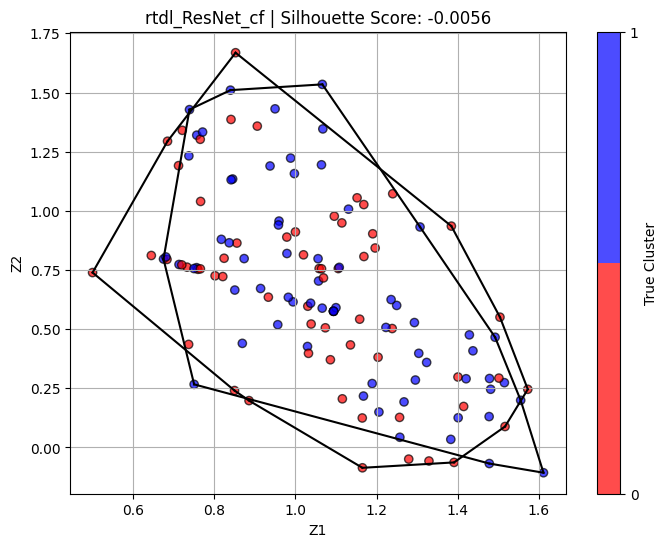

-0.005645967927629404


In [46]:
from pathlib import Path
from ms.utils.navigation import load
from ms.processing.preprocess import scale
from ms.processing.preprocess import fill_na

# target_model = "RandomForest"
for target_model in ["RandomForest", "LinearModel", "rtdl_MLP", "rtdl_FTTransformer", "rtdl_ResNet"]:
    for selector in selectors.values():
        print("-------------------")
        print(selector.name)
        print("-------------------")
        features = pd.read_csv("../../resources/tabzilla/filtered/features.csv", index_col=0)
        features, _ = scale(features, "quantile")
        features = fill_na(features)
        
        selected = load(Path(f"../../results/tabzilla/abs/{selector.name}/res.json"))
        features = features.loc[:, selected[target_model]["1"]]
        
        
        target_bin = pd.read_csv("../../resources/tabzilla/target/metrics__perf_abs.csv", index_col=0)
    
        raw_metrics = pd.read_csv("../../resources/tabzilla/target/metrics__raw.csv", index_col=0)
        datasets = features.merge(raw_metrics, on="dataset_name").index
        features = features.loc[datasets]
        raw_metrics = raw_metrics.loc[datasets]
        target_bin = target_bin.loc[datasets]
        
        res = isa.pilot(
            features=features,
            metrics=raw_metrics.loc[:, target_model].to_frame(),
        )
        selectors_res.append(res)
        print(res.summary.sort_index(axis="index", ascending=True, inplace=False))
        silhouette = plot(
            res=res,
            features=features,
            target_bin=target_bin.loc[:, target_model].to_frame(),
            selector_name=selector.name
        )
        print(silhouette)

-------------------
corr
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                             z1      z2
f__pymfe.model-based.var_importance.min -0.3209 -0.9843
f__pymfe.statistical.cor.min             0.0671 -1.2103
f__pymfe.statistical.cov.min            -0.3753 -0.6514
f__pymfe.statistical.mad.min            -0.4078 -0.9278
f__pymfe.statistical.max.min            -0.0891 -1.1705
f__pymfe.statistical.min.kurtosis        0.6416  0.1359
f__pymfe.statistical.sd.min             -0.1296 -1.0955
f__pymfe.statistical.sparsity.kurtosis   0.6656  0.1695
f__pymfe.statistical.sparsity.max        0.3826  0.0298
f__pymfe.statistical.sparsity.skewness   0.5355  0.2638
-------------------
f_val
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                             z1      z2
f__pymfe.model-based.var_importance.min  0.3681  0.3464
f__pymfe.statistical.cor.min            -0.0044  0.8193
f__pymfe.statistical.cov.min             0.4080  0.0922
f__pymfe.statistical.mad.min             0.4567  0.2394
f__pymfe.statistical.max.min             0.1296  0.6598
f__pymfe.statistical.min.kurtosis       -0.6563  0.4546
f__pymfe.statistical.sd.min              0.2007  0.5825
f__pymfe.statistical.sparsity.kurtosis  -0.6769  0.4543
f__pymfe.statistical.sparsity.max       -0.3820  0.3079
f__pymfe.statistical.sparsity.skewness  -0.5541  0.2913
-------------------
xgb
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                               z1      z2
f__pymfe.general.nr_attr                  -0.5468  0.0474
f__pymfe.general.nr_num                   -0.5709 -0.0079
f__pymfe.model-based.leaves_per_class.min -0.1712  0.8896
f__pymfe.model-based.tree_shape.sd        -0.0812  0.7860
f__pymfe.statistical.cov.kurtosis         -0.5195 -0.1806
f__pymfe.statistical.iq_range.skewness    -0.5387  0.0613
f__pymfe.statistical.min.min               0.0442  0.8906
f__pymfe.statistical.nr_cor_attr          -0.4725  0.1405
f__pymfe.statistical.range.kurtosis       -0.6488  0.1618
f__pymfe.statistical.sparsity.sd          -0.0426  0.5596
-------------------
cf
-------------------
Started PILOT
Performing BFGS optimization


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.


Computing z1, z2
                                             z1      z2
f__pymfe.model-based.var_importance.max -0.3970  0.5019
f__pymfe.model-based.var_importance.min -0.5438  0.1063
f__pymfe.statistical.cov.min            -0.4776  0.1733
f__pymfe.statistical.kurtosis.mean       0.2779  0.4696
f__pymfe.statistical.mad.min            -0.6512 -0.0726
f__pymfe.statistical.max.min            -0.5056  0.2845
f__pymfe.statistical.sd.min             -0.5347  0.1899
f__pymfe.statistical.sparsity.kurtosis   0.3595  0.6277
f__pymfe.statistical.sparsity.max        0.2111  0.4412
f__pymfe.statistical.sparsity.skewness   0.3417  0.5105
-------------------
te_dag
-------------------
Started PILOT
Performing BFGS optimization
Computing z1, z2
Empty DataFrame
Columns: [z1, z2]
Index: []


n_quantiles (1000) is greater than the total number of samples (165). n_quantiles is set to n_samples.
invalid value encountered in divide
invalid value encountered in divide


ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

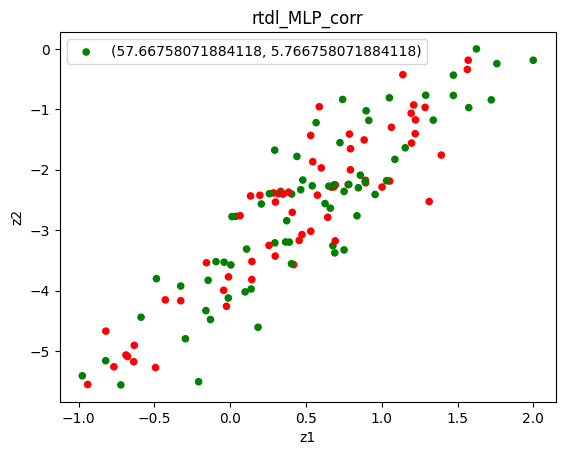

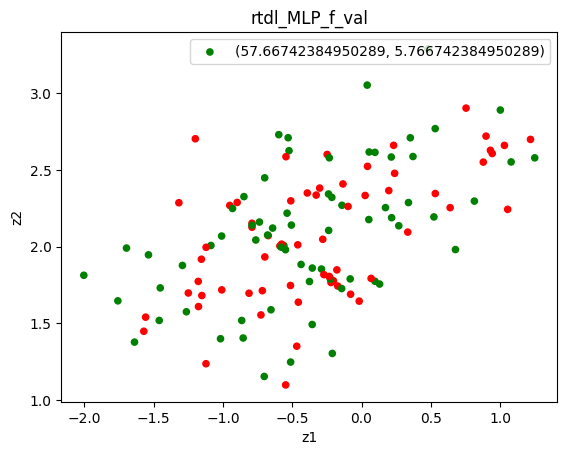

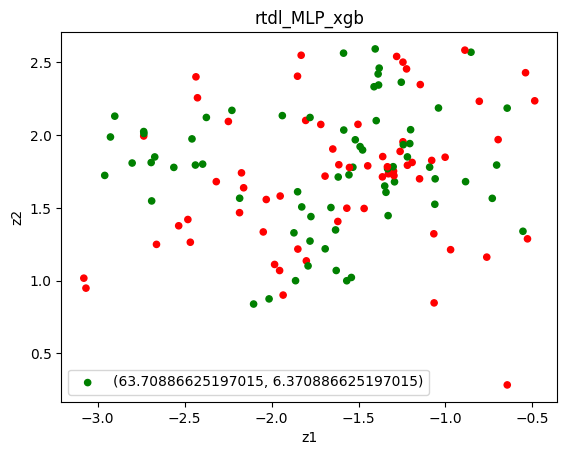

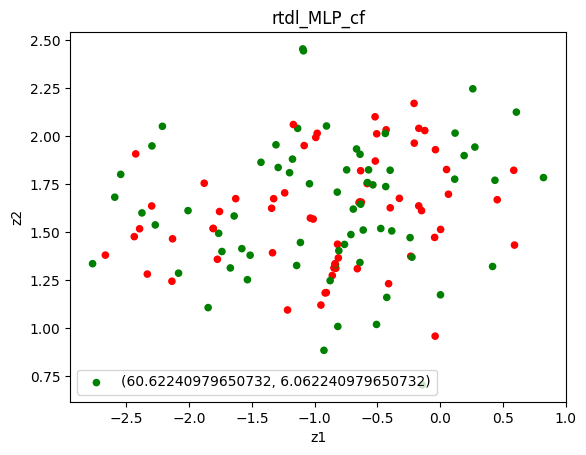

In [41]:
from pathlib import Path
from ms.utils.navigation import load
from ms.processing.preprocess import scale
from ms.processing.preprocess import fill_na

target_model = "rtdl_MLP"
for selector in selectors.values():
    print("-------------------")
    print(selector.name)
    print("-------------------")
    features = pd.read_csv("../../resources/tabzilla/filtered/features.csv", index_col=0)
    features, _ = scale(features, "quantile")
    features = fill_na(features)
    
    selected = load(Path(f"../../results/tabzilla/abs/{selector.name}/res.json"))
    features = features.loc[:, selected[target_model]["1"]]
    
    
    target_bin = pd.read_csv("../../resources/tabzilla/target/metrics__perf_abs.csv", index_col=0)

    raw_metrics = pd.read_csv("../../resources/tabzilla/target/metrics__raw.csv", index_col=0)
    datasets = features.merge(raw_metrics, on="dataset_name").index
    features = features.loc[datasets]
    raw_metrics = raw_metrics.loc[datasets]
    target_bin = target_bin.loc[datasets]
    
    res = isa.pilot(
        features=features,
        metrics=raw_metrics.loc[:, target_model].to_frame(),
    )
    selectors_res.append(res)
    print(res.summary.sort_index(axis="index", ascending=True, inplace=False))
    plot(
        res=res,
        features=features,
        target_bin=target_bin.loc[:, target_model].to_frame(),
        selector_name=selector.name
    )

In [ ]:
target_model = "rtdl_FTTransformer"
for selector in selectors:
    print("-------------------")
    print(selector.class_name)
    print("-------------------")
    features, target_bin = meta_learner.load_data(
        features_suffix="power",
        metrics_suffix="perf_abs",
        selector=selector,
        target_model=target_model
    )

    raw_metrics = meta_learner.load_metrics(suffix="raw").loc[:, target_model].to_frame(name=target_model)
    
    res = isa.pilot(
        features=features.iloc[:, :10],
        metrics=raw_metrics,
    )
    selectors_res.append(res)
    print(res.summary.sort_index(axis="index", ascending=True, inplace=False))
    plot(
        res=res,
        features=features.iloc[:, :10],
        target_bin=target_bin,
        selector_name=selector.class_name
    )

In [ ]:
for res in selectors_res:
    print(res.error, res.summary[0])